# Logistic Regression

## Satellite Image Classification 

Le but de ce projet est de **classifier des images satellites** en 4 catégorie possibles: "cloudy", "desert", "green area" ou "water".

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification

## Exercice


### Load Data
1. Loadez les data en utilisant le code qui vous est donné. Les data sont loadées dans un dictionnaire de la forme suivante:
   ```
   data_d = {"cloudy" : ([...], [...]), 
             "desert" : ([...], [...]), 
             "green_area" : ([...], [...]), 
             "water" : ([...], [...])}
   ```
   où pour chaque tuple `([...], [...])`, le premièr élément est une liste de numpy arrays (3D) qui repésentent les images en RGB, et le deuxième élément est une liste de labels associés à ces images.<br>
   Examinez ces data et comprenez leur format.


### Data Analysis
2. Comptez combien il y a d'images de chaque label, pour voir si le dataset est équilibré.


### Create Datasets
3. Créez une liste `X` qui contient les **images** (liste de numpy 3D-arrays) et une liste `y` qui contient les **labels** de ces images.


4. Remarquez qu'il y a des images de dimension `(256, 256, 3)` et d'autres de dimension `(64, 64, 3)`.<br>
   En utilisant la fonction `cv2.resize(...)`, redimensionnez toutes les images à la dimension `(64, 64, 3)`.<br>
   Vos image seront alors représentées par une liste `X` de numpy arrays de dimension `(64, 64, 3)`.
   

5. En utilisant la fonction `np.flatten(...)`, aplatissez chaque images de dimension `(64, 64, 3)` en un vecteur de taille `64 * 64 * 3 = 12288`. Vous devez obtenir une liste `X` d'images aplaties (i.e., une liste de 1D-arrays, dont chacun est de taille `12288`).


6. En utilisant la fonction `np.stack(...)`, convertissez votre liste d'images aplaties `X` en un numpy array de dimension 2, également appelé `X`.


7. En utilisant la fonction `train_test_split(...)`, splittez vos data `X` et `y` en un **train set** et un **test set** de tailles 80% wet 20%, respectivement.


### Model
9. Fittez une **régression logistique** sur vos data.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression<br>
    Calculer le **rapport de classification (classification report)** relatif à vos prédictions.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report<br>
    L'entrâinement peut prendre du temps... Essayez de "tuner" les hyperparamètres pour résussir à entraîner le modèle.


10. Fittez un **support vector machine classifier (SVC)** sur vos data:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC<br>
    Calculer le **rapport de classification (classification report)** relatif à vos prédictions.<br>
    L'entrâinement peut également prendre du temps...

## Librairies

In [137]:
# !pip install opencv-python
# !pip install imutils
import os
import cv2
from imutils import paths

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

## Load and Prepare Data

In [2]:
os.getcwd()

'/Users/jeremie.cabessau-paris2.fr/Desktop/MAIN/Courses/BUT/R4.04_MethOptim/TP'

In [3]:
cloudy_img = list(paths.list_files("./Data/SatelliteData/cloudy/"))
desert_img = list(paths.list_files("./Data/SatelliteData/desert/"))
green_area_img = list(paths.list_files("./Data/SatelliteData/green_area/"))
water_img = list(paths.list_files("./Data/SatelliteData/water/"))

In [4]:
data_l = [cloudy_img, desert_img, green_area_img, water_img]
data_d = {"cloudy" : ([], []), 
          "desert" : ([], []), 
          "green_area" : ([], []), 
          "water" : ([], [])}
labels = ["cloudy", "desert", "green_area", "water"]

for key, data in zip(labels, data_l):

    for img in data:
    
        img = cv2.imread(img)
        data_d[key][0].append(img)
        data_d[key][1].append(key)

Display some image of each category, because they are generatd form a specific palette of `matplotlib`.

cloudy


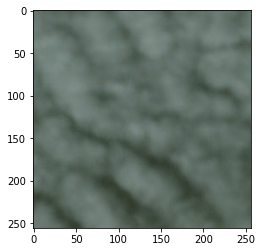

In [5]:
plt.imshow(data_d["cloudy"][0][1246])
print(data_d["cloudy"][1][1246])

desert


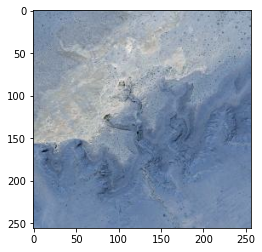

In [6]:
plt.imshow(data_d["desert"][0][577])
print(data_d["desert"][1][577])

green_area


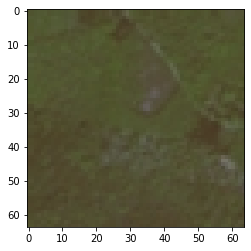

In [7]:
plt.imshow(data_d["green_area"][0][49])
print(data_d["green_area"][1][49])

water


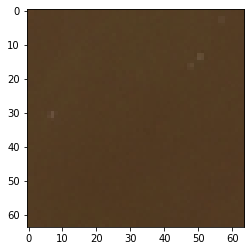

In [8]:
plt.imshow(data_d["water"][0][23])
print(data_d["water"][1][1])

In [9]:
# flatten tensors to process them via logistic regression

## Data Analysis

In [102]:
for k, v in data_d.items():
    print(f"{k}: {len(data_d[k][0])}")

cloudy: 1500
desert: 1131
green_area: 1500
water: 1500


The dataset is balanced.

In [103]:
dims_d = {}

for k, v in data_d.items():
    for img in v[0]:
        dim = img.shape
        if dim not in dims_d.keys():
            dims_d[dim] = 1
        else:
            dims_d[dim] += 1

## Create Datasets

In [117]:
X = []
y = []

for k, v in data_d.items():
    
    X.extend(data_d[k][0])
    y.extend(data_d[k][1])

In [118]:
len(X)

5631

In [119]:
len(X) == len(y)

True

In [120]:
dims = set({})

for x in X:
    dims.add(x.shape)

dims

{(64, 64, 3), (256, 256, 3)}

We have images of 2 kinds of dimensions: `(64, 64, 3)` and `(256, 256, 3)`. Let's convert all images to dimension `(64, 64, 3)` using the `cv2.resize(...)` function.

In [121]:
X = [cv2.resize(x, (64, 64), interpolation = cv2.INTER_AREA) for x in X]

In [123]:
dims = set({})

for x in X:
    dims.add(x.shape)

dims
# All images are resized now...

{(64, 64, 3)}

In [125]:
# We flatten all images and create a big 2D tensor out of them.
X_flatten = [x.flatten() for x in X]
X_flatten = np.stack(X_flatten, axis=0)
X_flatten.shape

(5631, 12288)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.2, random_state=42)

In [132]:
len(X_train), len(y_train), len(X_test), len(y_test)

(4504, 4504, 1127, 1127)

## Models

### Logistic Regression (LR)

In [151]:
# Training takes time...
lr = LogisticRegression(C=1e-4, max_iter=100)
lr.fit(X_train, y_train)
y_test_preds = lr.predict(X_test)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [152]:
print(classification_report(y_test, y_test_preds, digits=3))

              precision    recall  f1-score   support

      cloudy      0.965     0.924     0.944       328
      desert      0.912     0.956     0.933       227
  green_area      0.671     0.655     0.663       284
       water      0.661     0.684     0.672       288

    accuracy                          0.801      1127
   macro avg      0.802     0.805     0.803      1127
weighted avg      0.803     0.801     0.802      1127



### Support Vector Machine Classifier (SVC) 

In [153]:
svc = SVC()
svc.fit(X_train, y_train)
y_test_preds = svc.predict(X_test)

In [154]:
print(classification_report(y_test, y_test_preds, digits=3))

              precision    recall  f1-score   support

      cloudy      0.954     0.948     0.951       328
      desert      0.942     0.938     0.940       227
  green_area      0.827     0.961     0.889       284
       water      0.947     0.806     0.871       288

    accuracy                          0.913      1127
   macro avg      0.918     0.913     0.913      1127
weighted avg      0.918     0.913     0.913      1127

